# IntPic

This is a notebook showing some drawings related to numerical semigroups produced with the package [IntPic](https://www.gap-system.org/Packages/intpic.html).

We start by loading the package and setting the scale to 1.5, so that the pictures show bigger in the notebook.

In [2]:
LoadPackage("IntPic");
IP_TikzDefaultOptionsForArraysOfIntegers.scale:="1.5";;

true

Next we emphasize the "small elements" of the numerical semigroup $\langle 5,7\rangle$.

In [5]:
ns:=NumericalSemigroup(13,15,17);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
JupyterSplashTikZ(tkz);

We can modify the options to display the semigroup on a table instead.

In [9]:
ns := NumericalSemigroup(5,7);; 
opts:=rec(ns_table := true,negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"],opts);;
JupyterSplashTikZ(tkz);

In [13]:
opts := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"]);;
highlights := ["conductor", "min_generators", "small_elements"];;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,opts);;
JupyterSplashTikZ(tkz);

In [18]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
JupyterSplashTikZ(tkz);

The problem is that the output will not be shown on the GitHub previewer. A solution is to use picture to have a svg fallback.

In [466]:
jstpng:= function(tikz)
    local tmpdir, fn, header, ltx, pngfile, svgdata, svgfile, stream, pngdata, tojupyter, hasbp, img, b64file, b64cmd;

    hasbp:=PositionSublist(tikz,"begin{tikzpicture}")<>fail;

    header:=Concatenation( "\\documentclass[crop,tikz]{standalone}\n",
                    "\\usepackage{pgfplots}",
                    "\\makeatletter\n",
                    "\\batchmode\n",
                    "\\nonstopmode\n",
                    "\\begin{document}\n");
    if not(hasbp) then 
        Concatenation(header, "\\begin{tikzpicture}\n");
    fi;
    header:=Concatenation(header, tikz);
    if hasbp then 
        header:=Concatenation(header,"\\end{document}");    
    else
        header:=Concatenation(header,"\\end{tikzpicture}\n\\end{document}");
    fi;

    tmpdir := DirectoryTemporary();
    fn := Filename( tmpdir, "svg_get" );

    PrintTo( Concatenation( fn, ".tex" ), header );

    ltx := Concatenation( "pdflatex -shell-escape --output-directory ",
                   Filename( tmpdir, "" ), " ",
                   Concatenation( fn, ".tex" ), " > ", Concatenation( fn, ".log2" ) );
    Exec( ltx );

    if not( IsExistingFile( Concatenation(fn, ".pdf") ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No pdf was created; pdflatex is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    pngfile := Concatenation( fn, ".png" );
    ltx := Concatenation( "pdftoppm -png ", Concatenation( fn, ".pdf" ), " >> ", pngfile );
    #ltx := Concatenation( "convert ", Concatenation( fn, ".pdf" ), "  ", pngfile );
    Exec( ltx );
    
    if not( IsExistingFile( pngfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No png was created; pdftoppm is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    svgfile := Concatenation( fn, ".svg" );
    ltx := Concatenation( "pdf2svg ", Concatenation( fn, ".pdf" ), " ", svgfile);
    Exec( ltx );

    if not( IsExistingFile( svgfile ) ) then
        tojupyter := rec( json := true, name := "stdout",
                          data := "No svg was created; pdf2svg is installed in your system?",metadata:=rec() );
        return JupyterRenderable(tojupyter.data, tojupyter.metadata);
    fi;

    b64file := Concatenation( fn, ".b64" );
    if ARCH_IS_MAC_OS_X() then 
        b64cmd:="base64 -i ";
    else 
        b64cmd:="base64 ";
    fi;
    
    ltx := Concatenation( b64cmd, svgfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    svgdata:= ReadAll( stream );
    CloseStream( stream );
    ltx := Concatenation( b64cmd, pngfile," > ", b64file );
    Exec( ltx );
    stream := InputTextFile( b64file );
    pngdata:= ReadAll( stream );
    CloseStream( stream );

    #img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"'>"); testing separately
    #img:=Concatenation("<img src='data:image/png;base64,",pngdata,"'>");
    img:=Concatenation("<img srcset='data:image/svg+xml;base64,",svgdata,"' src='data:image/png;base64,",pngdata,"' alt='TikZ picture'>");
    img:=Concatenation("<img src='data:image/svg+xml;base64,",svgdata,"' onerror=\"this.src='data:image/png;base64,",pngdata,"'\"     alt='TikZ picture'>");

    return Objectify( JupyterRenderableType, rec(  data := rec( ("text/html") := img), metadata:=rec() ));
end;

function( tikz ) ... end


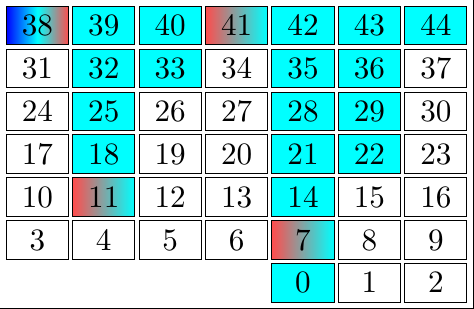

In [471]:
ns := NumericalSemigroup(7,11,38,41);;
highlights := ["conductor", "min_generators", "small_elements"];;
options := rec(ns_table:=true,colors:=["blue", "red!70", "-red", "black!40"],negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,highlights,options);;
jstpng(tkz);


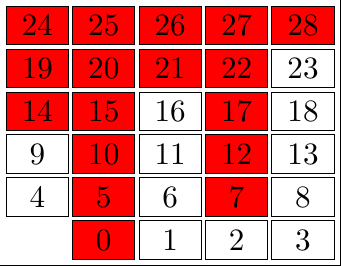

In [475]:
ns := NumericalSemigroup(5,7);; 
opts:=rec(ns_table := true,negatives:=false);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"],opts);;
jstpng(tkz);


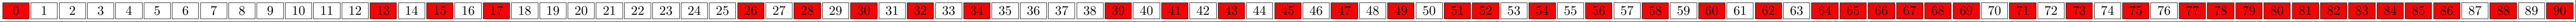

In [455]:
ns:=NumericalSemigroup(13,15,17);;
tkz := TikzCodeForNumericalSemigroup(ns,["small_elements"]);;
jstpng(tkz);